In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('E:/Projects/Learn ML/loan-default-predictor/data/2_removed_missing_values.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
dataset.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,purpose,application_type,emp_length,home_ownership,annual_inc,verification_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_d,loan_status,fico_range
0,646020,10000.0,36 months,10.36%,B,B5,debt_consolidation,Individual,10+ years,RENT,40000.0,Source Verified,16.17,May-1994,9.0,1.0,14555.0,90.4%,20.0,1.0,0.0,Jan-2011,Charged Off,702.0
1,585502,16000.0,60 months,16.45%,E,E1,debt_consolidation,Individual,5 years,RENT,60000.0,Not Verified,16.60,Mar-1999,4.0,0.0,18607.0,92.6%,11.0,1.0,0.0,Oct-2010,Charged Off,707.0
2,1035817,20000.0,60 months,18.25%,D,D5,debt_consolidation,Individual,10+ years,MORTGAGE,51400.0,Verified,11.49,May-1992,16.0,0.0,22331.0,84.9%,46.0,4.0,0.0,Dec-2011,Charged Off,682.0
3,288651,3000.0,36 months,10.51%,B,B2,debt_consolidation,Individual,8 years,MORTGAGE,40000.0,Not Verified,16.08,May-1999,23.0,0.0,14582.0,26.7%,31.0,1.0,0.0,Nov-2008,Charged Off,727.0
4,212894,3250.0,36 months,7.75%,A,A3,debt_consolidation,Individual,4 years,OWN,36000.0,Not Verified,2.73,Jan-2001,5.0,0.0,2353.0,12.4%,7.0,0.0,0.0,Jan-2008,Charged Off,742.0


In [6]:
dataset = dataset.drop(columns=['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

In [7]:
dataset

,id,loan_amnt,term,int_rate,grade,sub_grade,purpose,application_type,emp_length,home_ownership,annual_inc,verification_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_d,loan_status,fico_range
0,646020,10000.0,36 months,10.36%,B,B5,debt_consolidation,Individual,10+ years,RENT,40000.0,Source Verified,16.17,May-1994,9.0,1.0,14555.0,90.4%,20.0,1.0,0.0,Jan-2011,Charged Off,702.0
1,585502,16000.0,60 months,16.45%,E,E1,debt_consolidation,Individual,5 years,RENT,60000.0,Not Verified,16.60,Mar-1999,4.0,0.0,18607.0,92.6%,11.0,1.0,0.0,Oct-2010,Charged Off,707.0
2,1035817,20000.0,60 months,18.25%,D,D5,debt_consolidation,Individual,10+ years,MORTGAGE,51400.0,Verified,11.49,May-1992,16.0,0.0,22331.0,84.9%,46.0,4.0,0.0,Dec-2011,Charged Off,682.0
3,288651,3000.0,36 months,10.51%,B,B2,debt_consolidation,Individual,8 years,MORTGAGE,40000.0,Not Verified,16.08,May-1999,23.0,0.0,14582.0,26.7%,31.0,1.0,0.0,Nov-2008,Charged Off,727.0
4,212894,3250.0,36 months,7.75%,A,A3,debt_consolidation,Individual,4 years,OWN,36000.0,Not Verified,2.73,Jan-2001,5.0,0.0,2353.0,12.4%,7.0,0.0,0.0,Jan-2008,Charged Off,742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371640,105163370,11750.0,36 months,11.49%,B,B5,debt_consolidation,Individual,3 years,MORTGAGE,72300.0,Source Verified,22.71,Apr-1996,28.0,0.0,21533.0,38.5%,45.0,2.0,0.0,Apr-2017,Fully Paid,702.0
371641,106504271,8000.0,36 months,14.99%,C,C4,debt_consolidation,Individual,6 years,MORTGAGE,90000.0,Source Verified,17.64,Feb-2011,10.0,3.0,9983.0,45.6%,15.0,1.0,0.0,Apr-2017,Fully Paid,687.0
371642,105668947,9000.0,36 months,11.49%,B,B5,debt_consolidation,Joint App,10+ years,OWN,64000.0,Not Verified,27.64,Apr-1997,8.0,0.0,15217.0,76.1%,14.0,3.0,0.0,Apr-2017,Fully Paid,722.0
371643,104302384,35000.0,60 months,15.99%,C,C5,debt_consolidation,Individual,8 years,MORTGAGE,118000.0,Verified,20.51,Mar-2005,11.0,0.0,31715.0,85.5%,25.0,2.0,0.0,Apr-2017,Fully Paid,682.0


In [8]:
cols = [x for x in dataset.columns]

In [9]:
catgorical_cols = [x for x in cols if dataset[x].dtype=='O']
print(catgorical_cols)

numerical_cols = [x for x in cols if dataset[x].dtype!='O']
print(numerical_cols)

['term', 'int_rate', 'grade', 'sub_grade', 'purpose', 'application_type', 'emp_length', 'home_ownership', 'verification_status', 'earliest_cr_line', 'revol_util', 'issue_d', 'loan_status']
['id', 'loan_amnt', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'fico_range']


##### I didn't removed issue_d because it will help to train, test model based on time later, also it will help for get to know when that loan was applied and loan_status is target variable

In [10]:
dataset['term_num'] = dataset['term'].str.replace('months', '').str.strip().astype(int)

In [11]:
dataset['int_rate_num'] = dataset['int_rate'].str.replace('%', '').str.strip().astype(float)

In [12]:
subgrade_mapping = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35
}

dataset['sub_grade_map'] = dataset['sub_grade'].map(subgrade_mapping)

In [13]:
dataset['purpose'].unique()

array(['debt_consolidation', 'other', 'credit_card', 'home_improvement',
       'small_business', 'house', 'car', 'major_purchase', 'wedding',
       'moving', 'medical', 'vacation', 'educational', 'renewable_energy'],
      dtype=object)

In [14]:
dataset['emp_length'].value_counts()

emp_length
10+ years    122268
2 years       33643
< 1 year      30677
3 years       29670
1 year        24637
5 years       23213
0             23194
4 years       22456
6 years       17164
8 years       15734
7 years       15614
9 years       13375
Name: count, dtype: int64

In [15]:
dataset['emp_length_num'] = dataset['emp_length'].str.replace('years', '').str.replace('year', '').str.replace('+', '').str.replace('< 1','0.5').str.strip().astype(float)

In [16]:
dataset['home_ownership'].value_counts()

home_ownership
MORTGAGE    183442
RENT        146935
OWN          40994
ANY            236
OTHER           27
NONE            11
Name: count, dtype: int64

In [17]:
dataset['home_ownership_new'] = dataset['home_ownership'].replace({'ANY':'OTHER', 'NONE':'OTHER'})

In [18]:
dataset['verification_status'].value_counts()

verification_status
Source Verified    146659
Not Verified       117254
Verified           107732
Name: count, dtype: int64

In [19]:
dataset['earliest_cr_line'].value_counts()

earliest_cr_line
Sep-2004    2544
Sep-2003    2488
Aug-2002    2456
Aug-2001    2399
Oct-2003    2392
            ... 
Jun-1957       1
Mar-1960       1
Dec-1961       1
Jan-1950       1
Jan-1944       1
Name: count, Length: 701, dtype: int64

In [20]:
dataset['earliest_cr_line_date'] = pd.to_datetime(dataset['earliest_cr_line'], format='%b-%Y')
dataset['issue_d_date'] = pd.to_datetime(dataset['issue_d'], format='%b-%Y')

In [21]:
dataset['earliest_cr_line_months'] = (((dataset['issue_d_date'].dt.year)*12-(dataset['earliest_cr_line_date'].dt.year)*12) + (dataset['issue_d_date'].dt.month-dataset['earliest_cr_line_date'].dt.month))

In [ ]:
dataset[['earliest_cr_line_months', 'earliest_cr_line', 'issue_d', 'issue_d_date', 'earliest_cr_line_date']].head()

,earliest_cr_line_months,earliest_cr_line,issue_d,earliest_cr_line_date
0,200,May-1994,Jan-2011,1994-05-01
1,139,Mar-1999,Oct-2010,1999-03-01
2,235,May-1992,Dec-2011,1992-05-01
3,114,May-1999,Nov-2008,1999-05-01
4,84,Jan-2001,Jan-2008,2001-01-01


In [23]:
dataset['revol_util_num'] = dataset['revol_util'].str.replace('%', '').astype(float)

In [123]:
df = dataset.drop(columns=['term', 'int_rate', 'grade', 'sub_grade',  'emp_length', 'home_ownership', 'earliest_cr_line', 'earliest_cr_line_date', 'issue_d', 'revol_util']
)

In [124]:
df

,id,loan_amnt,purpose,application_type,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,total_acc,mort_acc,pub_rec_bankruptcies,loan_status,fico_range,term_num,int_rate_num,sub_grade_map,emp_length_num,home_ownership_new,issue_d_date,earliest_cr_line_months,revol_util_num
0,646020,10000.0,debt_consolidation,Individual,40000.0,Source Verified,16.17,9.0,1.0,14555.0,20.0,1.0,0.0,Charged Off,702.0,36,10.36,10,10.0,RENT,2011-01-01,200,90.4
1,585502,16000.0,debt_consolidation,Individual,60000.0,Not Verified,16.60,4.0,0.0,18607.0,11.0,1.0,0.0,Charged Off,707.0,60,16.45,21,5.0,RENT,2010-10-01,139,92.6
2,1035817,20000.0,debt_consolidation,Individual,51400.0,Verified,11.49,16.0,0.0,22331.0,46.0,4.0,0.0,Charged Off,682.0,60,18.25,20,10.0,MORTGAGE,2011-12-01,235,84.9
3,288651,3000.0,debt_consolidation,Individual,40000.0,Not Verified,16.08,23.0,0.0,14582.0,31.0,1.0,0.0,Charged Off,727.0,36,10.51,7,8.0,MORTGAGE,2008-11-01,114,26.7
4,212894,3250.0,debt_consolidation,Individual,36000.0,Not Verified,2.73,5.0,0.0,2353.0,7.0,0.0,0.0,Charged Off,742.0,36,7.75,3,4.0,OWN,2008-01-01,84,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371640,105163370,11750.0,debt_consolidation,Individual,72300.0,Source Verified,22.71,28.0,0.0,21533.0,45.0,2.0,0.0,Fully Paid,702.0,36,11.49,10,3.0,MORTGAGE,2017-04-01,252,38.5
371641,106504271,8000.0,debt_consolidation,Individual,90000.0,Source Verified,17.64,10.0,3.0,9983.0,15.0,1.0,0.0,Fully Paid,687.0,36,14.99,14,6.0,MORTGAGE,2017-04-01,74,45.6
371642,105668947,9000.0,debt_consolidation,Joint App,64000.0,Not Verified,27.64,8.0,0.0,15217.0,14.0,3.0,0.0,Fully Paid,722.0,36,11.49,10,10.0,OWN,2017-04-01,240,76.1
371643,104302384,35000.0,debt_consolidation,Individual,118000.0,Verified,20.51,11.0,0.0,31715.0,25.0,2.0,0.0,Fully Paid,682.0,60,15.99,15,8.0,MORTGAGE,2017-04-01,145,85.5


In [125]:
numerical_cols = [x for x in df.columns if df[x].dtype!='O']
print(len(numerical_cols), ": ", numerical_cols)
categorical_cols = [x for x in df.columns if df[x].dtype=='O']
print(len(categorical_cols), ": ", categorical_cols)

18 :  ['id', 'loan_amnt', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'fico_range', 'term_num', 'int_rate_num', 'sub_grade_map', 'emp_length_num', 'issue_d_date', 'earliest_cr_line_months', 'revol_util_num']
5 :  ['purpose', 'application_type', 'verification_status', 'loan_status', 'home_ownership_new']


In [126]:
df['term_num'].unique().size

2

In [127]:
for x in numerical_cols:
    print(f'{x}: {df[x].unique().size}')

id: 371645
loan_amnt: 1520
annual_inc: 25397
dti: 6102
open_acc: 70
pub_rec: 24
revol_bal: 56838
total_acc: 123
mort_acc: 32
pub_rec_bankruptcies: 10
fico_range: 38
term_num: 2
int_rate_num: 642
sub_grade_map: 35
emp_length_num: 12
issue_d_date: 160
earliest_cr_line_months: 670
revol_util_num: 1176


In [137]:
for x in df.columns:
    print(f'{x}: {df[x].dtype}')

id: int64
loan_amnt: float64
purpose: object
application_type: object
annual_inc: float64
verification_status: object
dti: float64
open_acc: float64
pub_rec: float64
revol_bal: float64
total_acc: float64
mort_acc: float64
pub_rec_bankruptcies: float64
loan_status: object
fico_range: float64
term_num: int64
int_rate_num: float64
sub_grade_map: int64
emp_length_num: float64
home_ownership_new: object
issue_d_date: datetime64[ns]
earliest_cr_line_months: int32
revol_util_num: float64


In [140]:
continuous_cols = [x for x in numerical_cols if df[x].unique().size>=130 and df[x].dtypes!='O']
discreate_cols = [x for x in numerical_cols if df[x].unique().size<130 and df[x].dtype!='O']

In [141]:
print(continuous_cols)
print(discreate_cols)

['id', 'loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'int_rate_num', 'issue_d_date', 'earliest_cr_line_months', 'revol_util_num']
['open_acc', 'pub_rec', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'fico_range', 'term_num', 'sub_grade_map', 'emp_length_num']


In [142]:
continuous_cols.remove('issue_d_date')

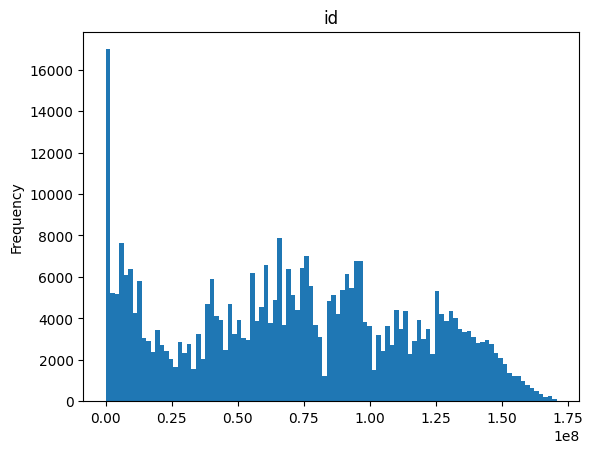

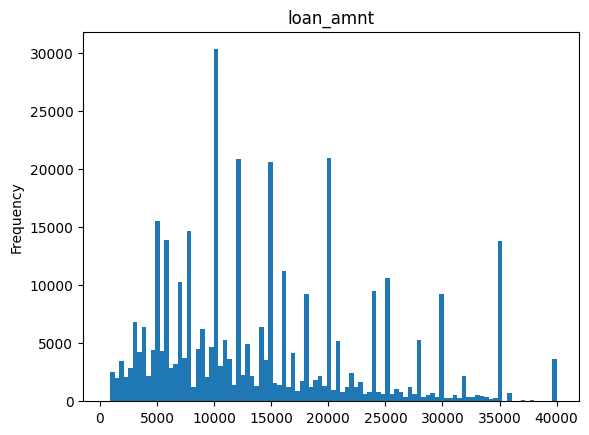

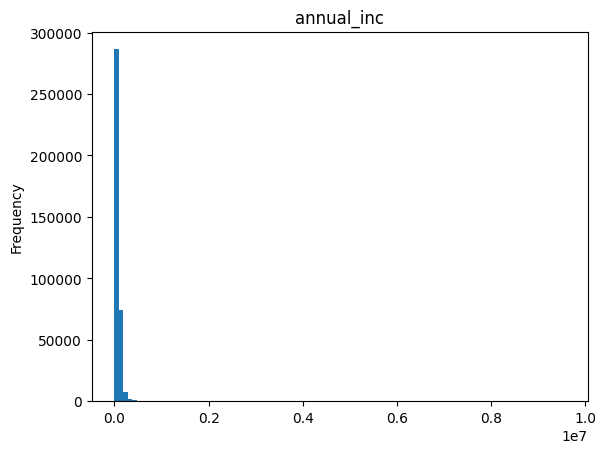

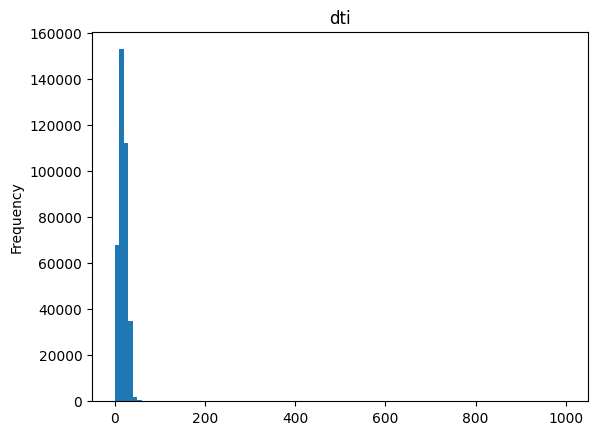

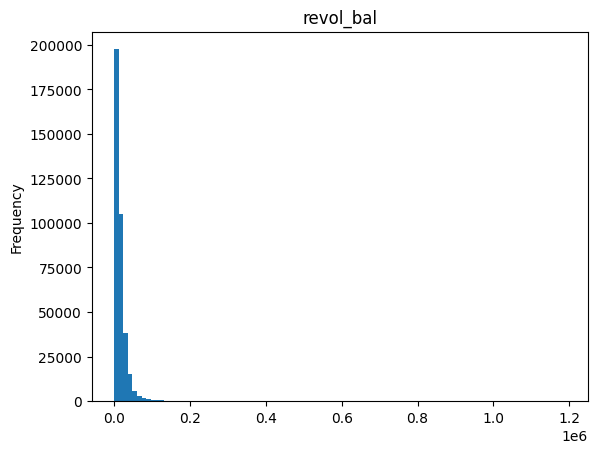

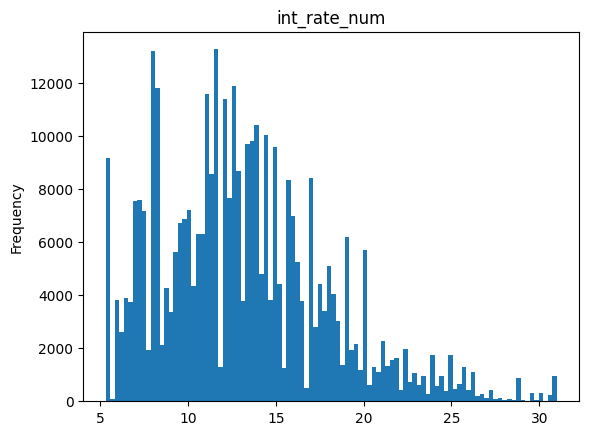

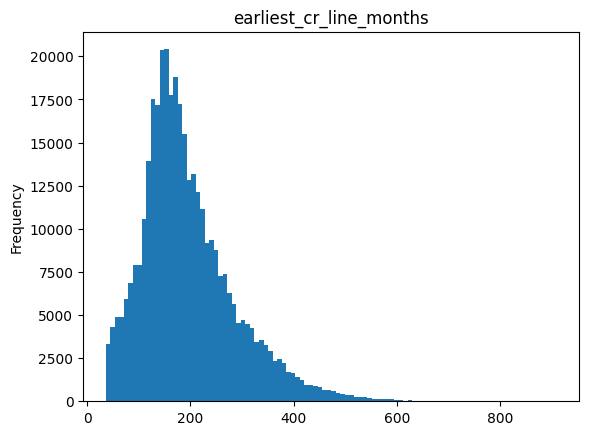

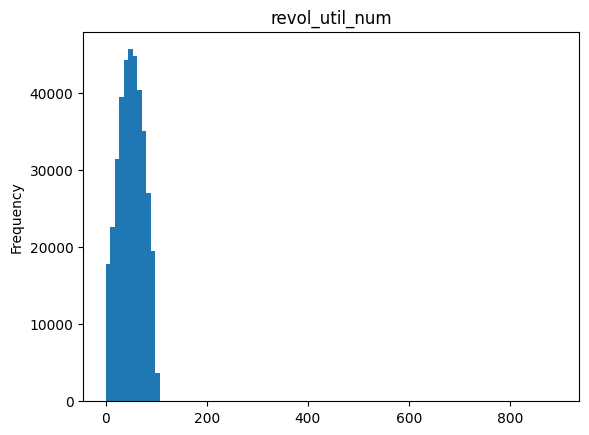

In [143]:
import matplotlib.pyplot as plt

for x in continuous_cols:
    df[x].plot.hist(bins=100)
    plt.title(x)
    plt.show()

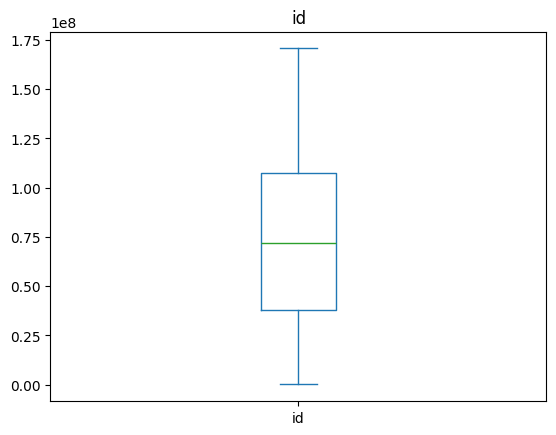

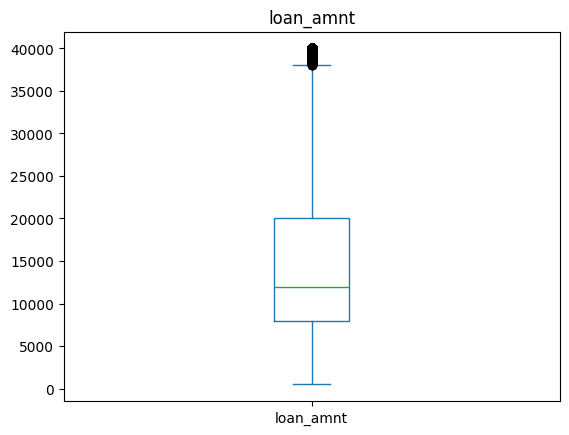

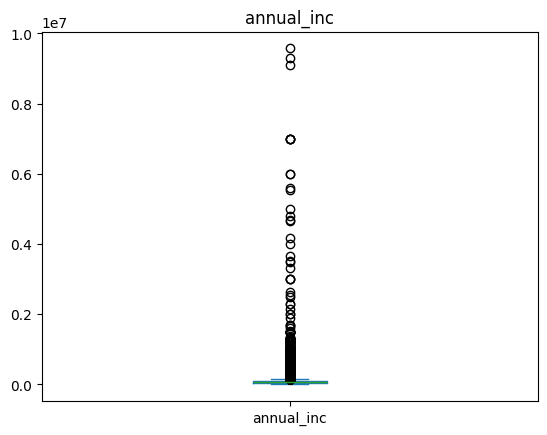

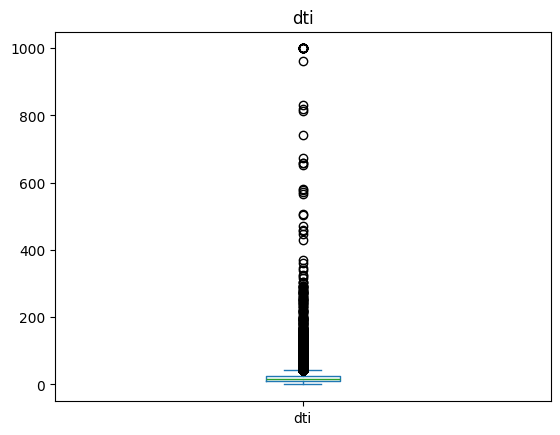

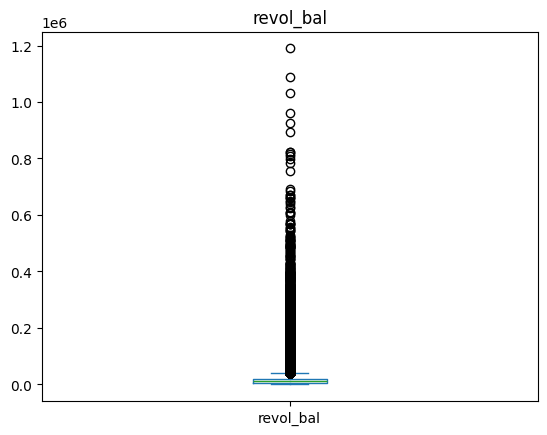

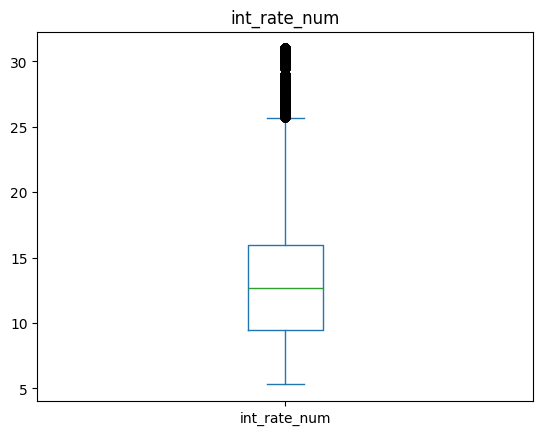

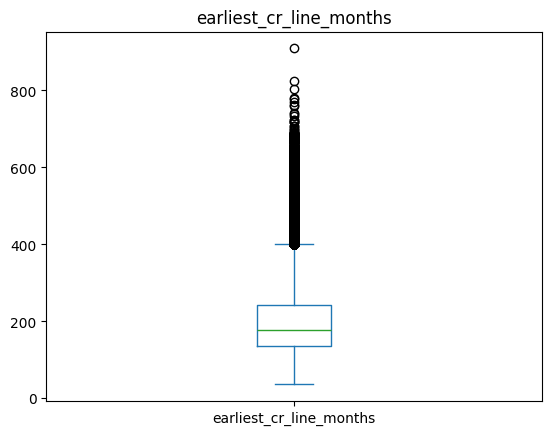

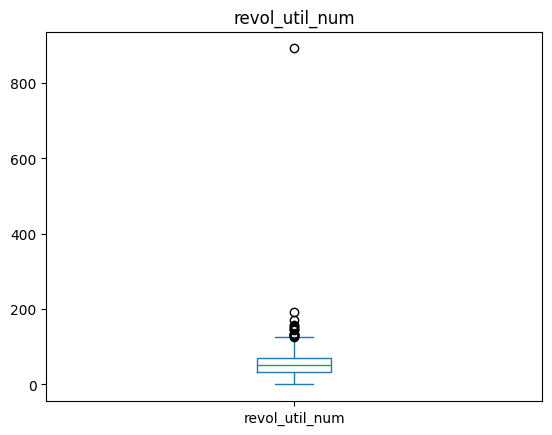

In [144]:
for x in continuous_cols:
    df[x].plot.box()
    plt.title(x)
    plt.show()

In [67]:
df_cleaned_quantile = df.copy()

In [68]:
for x in continuous_cols:
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_cleaned_quantile = df_cleaned_quantile[(df_cleaned_quantile[x] >= lower_bound) & (df_cleaned_quantile[x] <= upper_bound)]

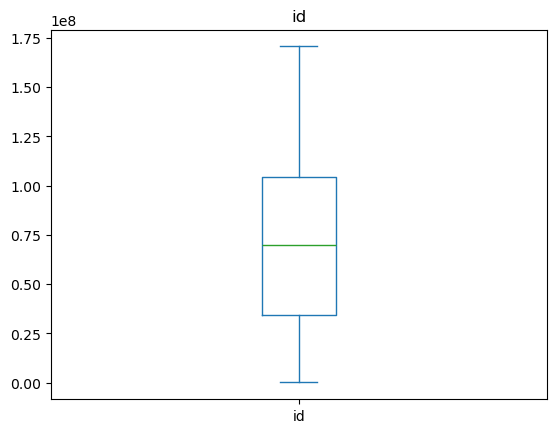

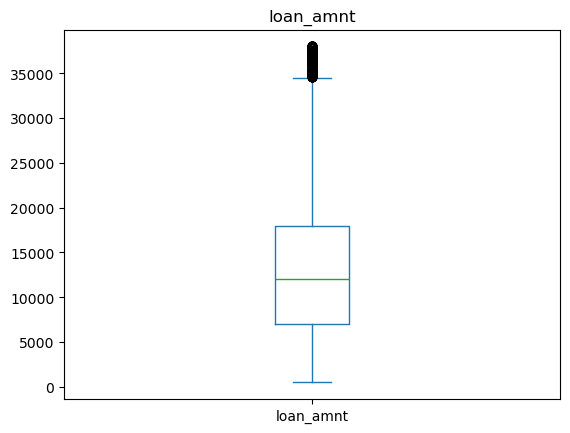

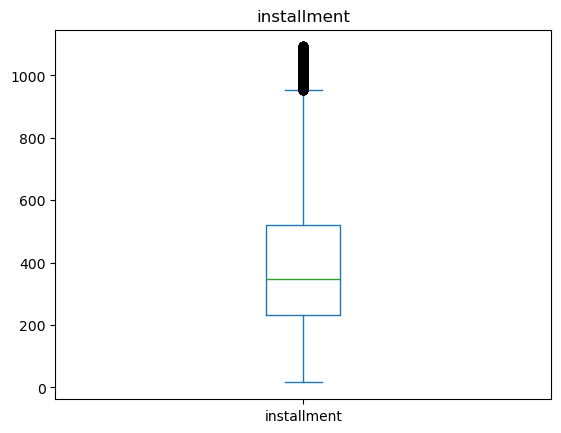

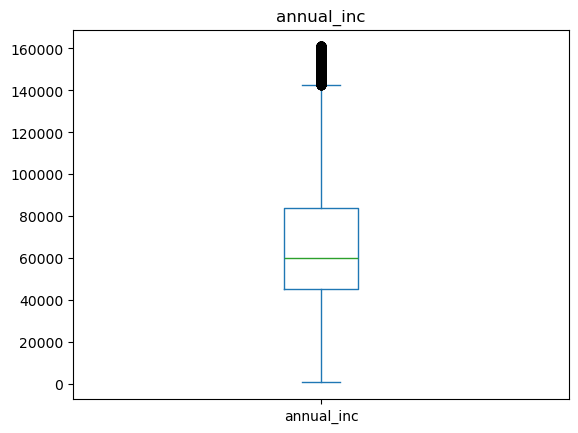

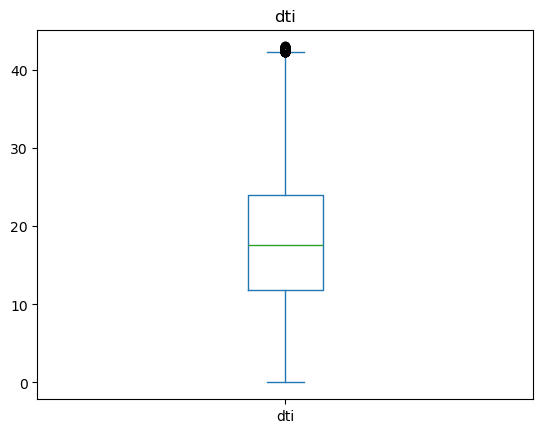

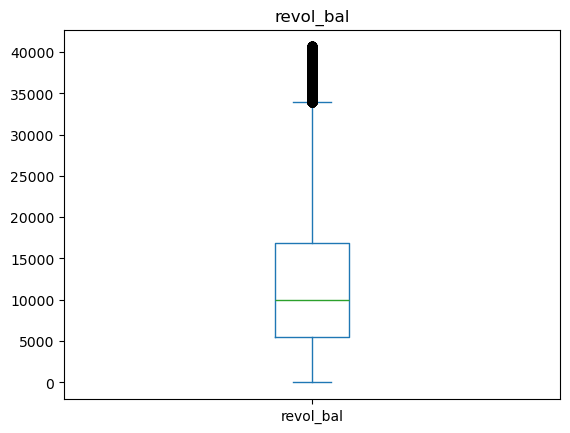

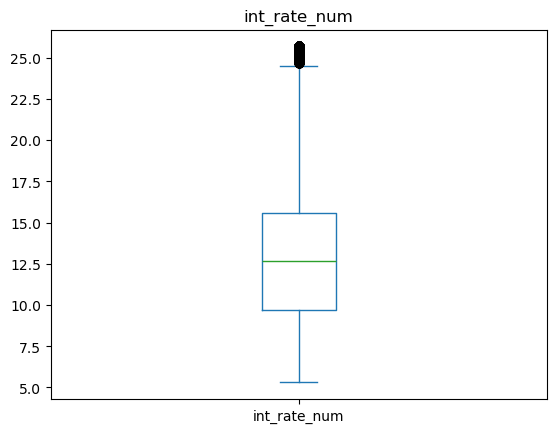

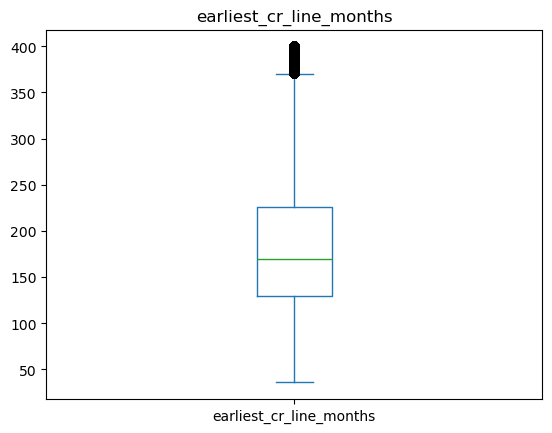

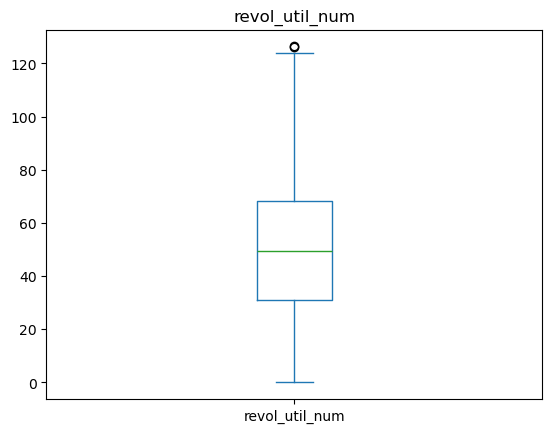

In [69]:
for x in continuous_cols:
    df_cleaned_quantile[x].plot.box()
    plt.title(x)
    plt.show()

In [70]:
df_cleaned_zscore = df.copy()

In [71]:
from scipy import stats

for x in continuous_cols:
    df_cleaned_zscore['zscore'] = np.abs(stats.zscore(df_cleaned_zscore[x]))
    df_cleaned_zscore = df_cleaned_zscore[df_cleaned_zscore['zscore']<3]

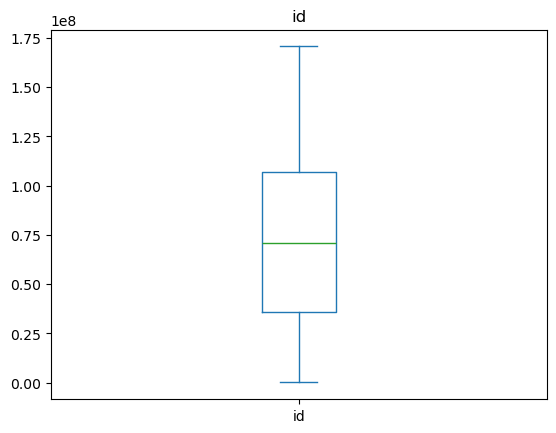

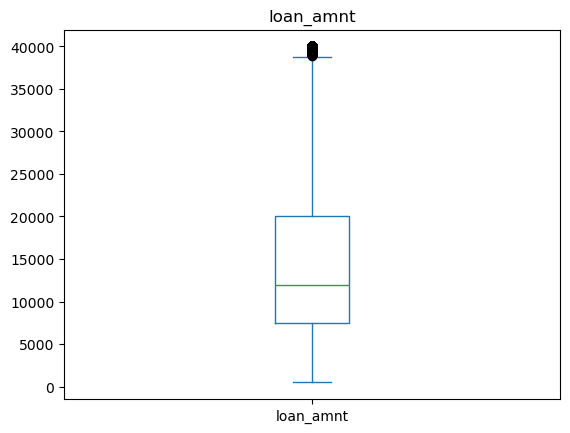

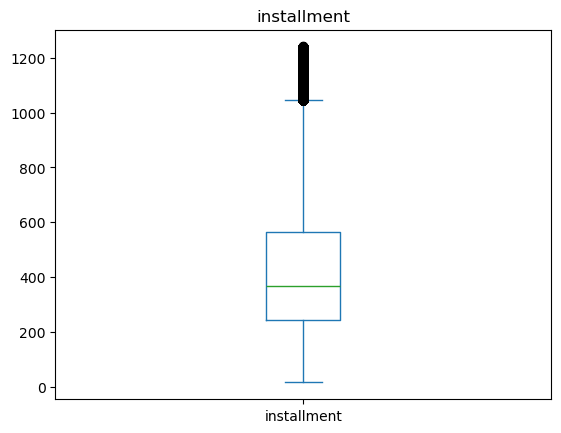

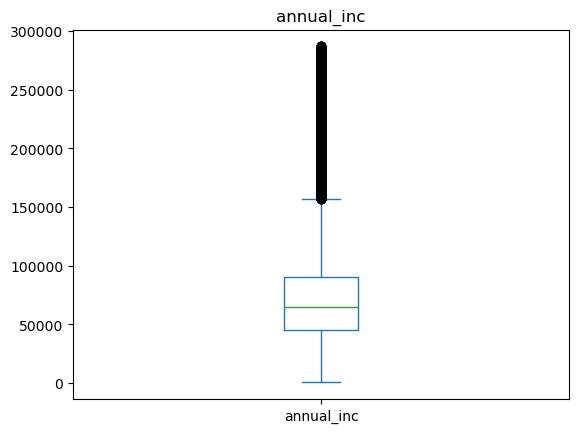

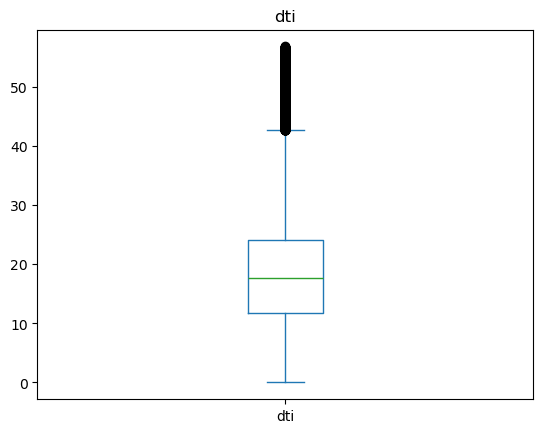

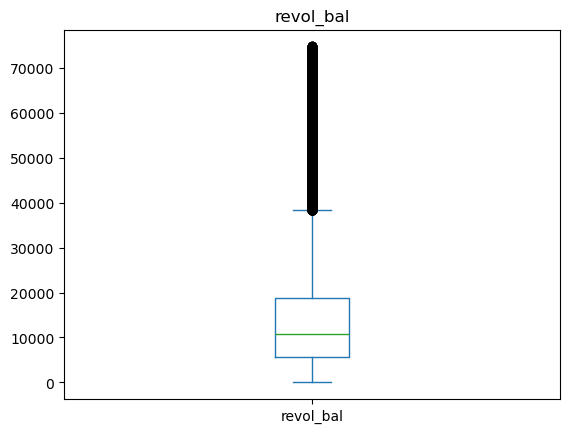

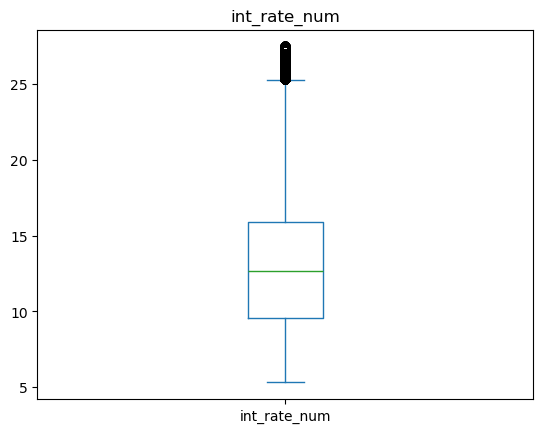

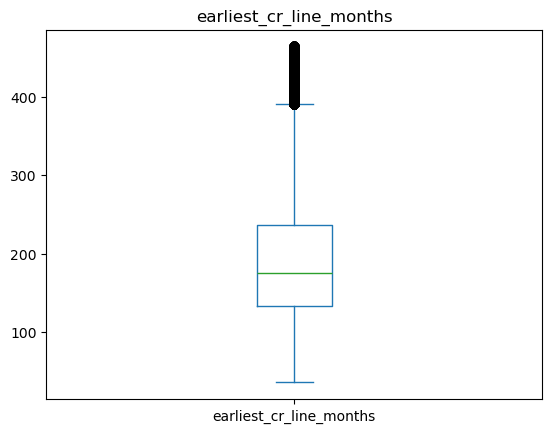

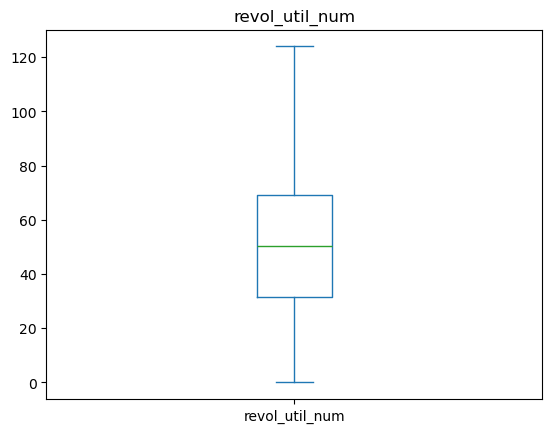

In [72]:
for x in continuous_cols:
    df_cleaned_zscore[x].plot.box()
    plt.title(x)
    plt.show()

In [145]:
df_cleaned = df.copy()

In [146]:
df_cleaned[df_cleaned['dti']>100]['dti'].describe()

count    287.000000
mean     248.983972
std      236.860183
min      100.160000
25%      117.600000
50%      153.090000
75%      253.005000
max      999.000000
Name: dti, dtype: float64

In [147]:
df_cleaned[df_cleaned['dti']>100]['application_type'].value_counts()

application_type
Joint App    287
Name: count, dtype: int64

In [148]:
### seems like  system make error on joint applications so debit to income ratio became larger than 100, but numers are too less than total dataset ~287 so we can remove these

df_cleaned = df_cleaned[df_cleaned['dti']<=100]

In [149]:
df_cleaned[df_cleaned['revol_util_num']>=100]['revol_util_num'].describe()

count    1429.000000
mean      103.229811
std        21.725213
min       100.000000
25%       100.400000
50%       101.000000
75%       102.400000
max       892.300000
Name: revol_util_num, dtype: float64

### unlike dti, revol_util can have more than 100% because it is revolving balance, so people can use more than their credit limit or extra charges/penalties can be added but having too high value like 892% is not possible

In [150]:
# lets check what is 99.9 percentile people having this value average
df['revol_util_num'].quantile(0.999)

np.float64(102.2)

In [151]:
df_cleaned = df_cleaned[df_cleaned['revol_util_num']<=103]

In [152]:
#### installment and earliest_cr_line_months are like normal distribution, but right skewed, and it is not like taking extream values, so its okay to have it, so we will apply log transformation later if needed

In [153]:
### int_rate_num has some extreme values too, but its okay as interest rate can be high for risky borrowers

In [154]:
df['loan_amnt'].describe()

count    371645.000000
mean      14594.013306
std        8956.475090
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [155]:
# IQR
Q1 = df['loan_amnt'].quantile(0.25)
Q3=df['loan_amnt'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(lower_bound)
print(upper_bound)

-10000.0
38000.0


#### min in data is 500, which is fine. and maximum is 40k, so it is also accpetable, no outliers

In [156]:
from scipy import stats
for x in numerical_cols:
    print(x, ": ", not df[np.abs(stats.zscore(df[x]))>3].empty)

id :  False
loan_amnt :  False
annual_inc :  True
dti :  True
open_acc :  True
pub_rec :  True
revol_bal :  True
total_acc :  True
mort_acc :  True
pub_rec_bankruptcies :  True
fico_range :  True
term_num :  False
int_rate_num :  True
sub_grade_map :  True
emp_length_num :  False
issue_d_date :  True
earliest_cr_line_months :  True
revol_util_num :  True


In [157]:
df_cleaned['annual_inc'].describe().round(2)

count     371069.00
mean       77410.05
std        71347.16
min          430.00
25%        46000.00
50%        65000.00
75%        92000.00
max      9573072.00
Name: annual_inc, dtype: float64

In [158]:
print(df[stats.zscore(df['annual_inc'])<-0.5]['annual_inc'].describe().round(2)) # below average
print(df[stats.zscore(df['annual_inc'])>+0.5]['annual_inc'].describe().round(2)) # higher than average

count    70329.00
mean     31811.06
std       7418.60
min        100.00
25%      27040.00
50%      33280.00
75%      38000.00
max      41694.00
Name: annual_inc, dtype: float64
count      54505.00
mean      169944.61
std       146774.84
min       113100.00
25%       125000.00
50%       143000.00
75%       177000.00
max      9573072.00
Name: annual_inc, dtype: float64


In [159]:
Q3 = df_cleaned['annual_inc'].quantile(0.75)
IQR = Q3 - df_cleaned['annual_inc'].quantile(0.25)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
print(df_cleaned['annual_inc'].max()/upper_bound)

df_cleaned[df_cleaned['annual_inc']>upper_bound]['annual_inc'].describe().round(2)

161000.0
59.46007453416149


count      17499.00
mean      248499.61
std       239913.35
min       161089.00
25%       180000.00
50%       200000.00
75%       250000.00
max      9573072.00
Name: annual_inc, dtype: float64

#### these are important peoples so, we can't remove them but will apply log transform later to reduce difference btw average and extreme values

In [160]:
df_cleaned['revol_bal'].describe().round(2)

count     371069.00
mean       16312.31
std        22250.27
min            0.00
25%         5870.00
50%        11100.00
75%        19788.00
max      1190046.00
Name: revol_bal, dtype: float64

### results are very much similar with income feature(extream min value and extream max value), so we will apply log transform later 

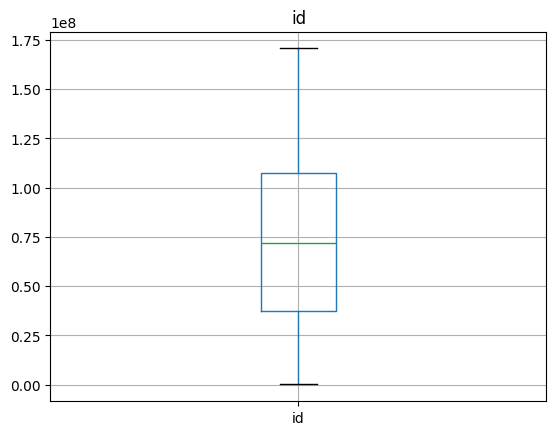

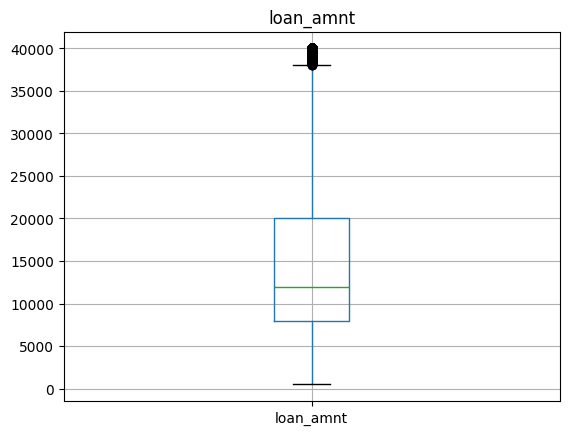

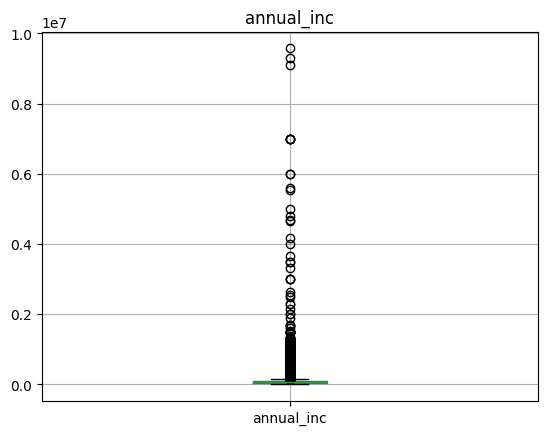

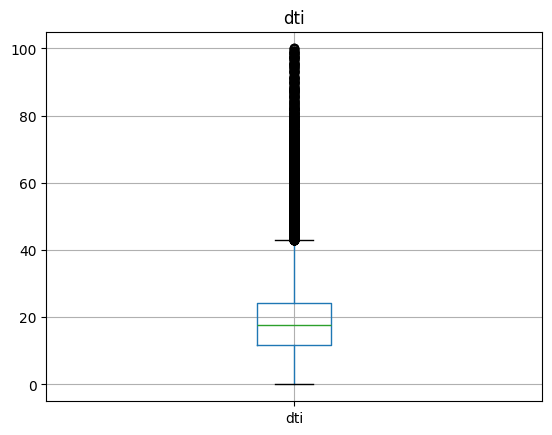

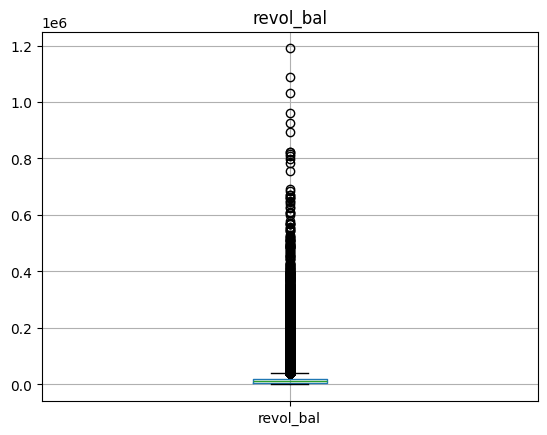

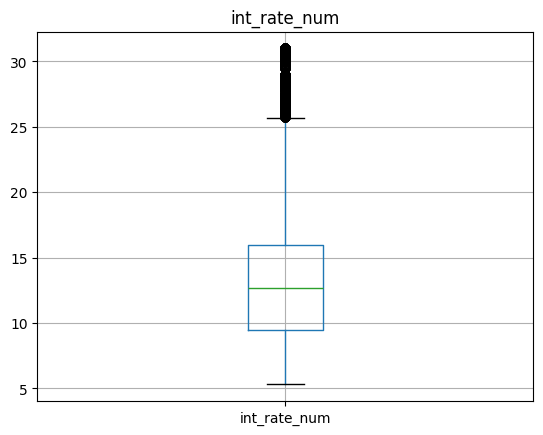

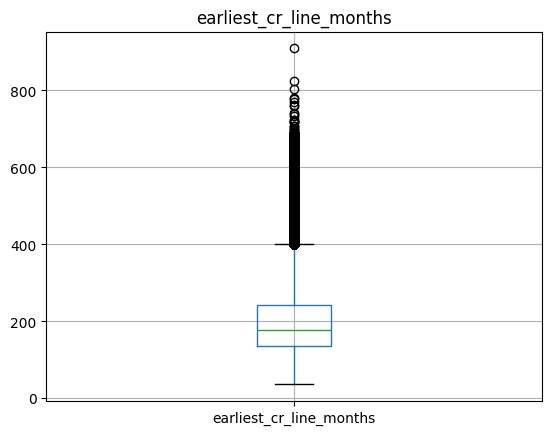

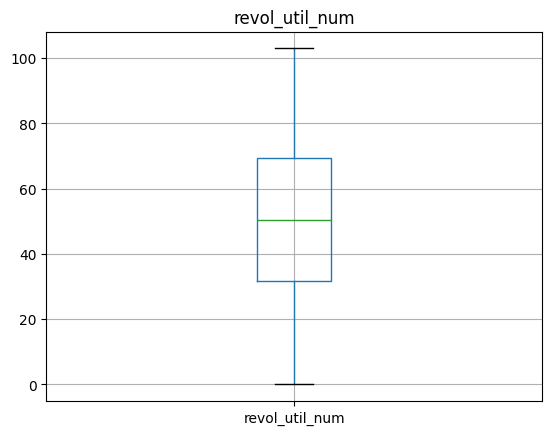

In [161]:
for x in continuous_cols:
    df_cleaned.boxplot(column=x)
    plt.title(x)
    plt.show()

### Will apply log transform to reduce difference between average and extreme values for anuual_inc, revol_bal features, earliest_cr_line_months_log, loan_amnt

In [162]:
df_cleaned['annual_inc_log'] = np.log(df_cleaned['annual_inc'])

<Axes: ylabel='Frequency'>

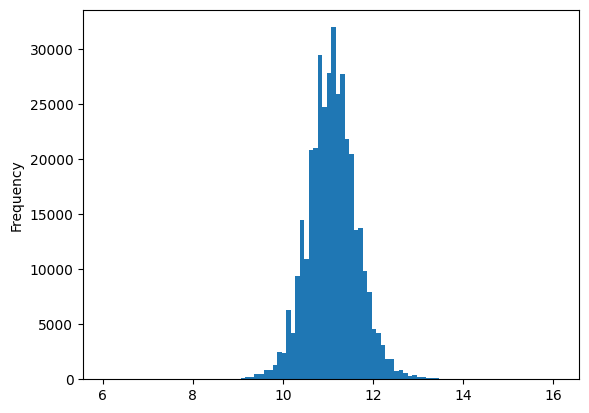

In [163]:
df_cleaned['annual_inc_log'].plot.hist(bins=100)

In [164]:
df_cleaned['revol_bal_log'] = np.log1p(df_cleaned['revol_bal'])

<Axes: ylabel='Frequency'>

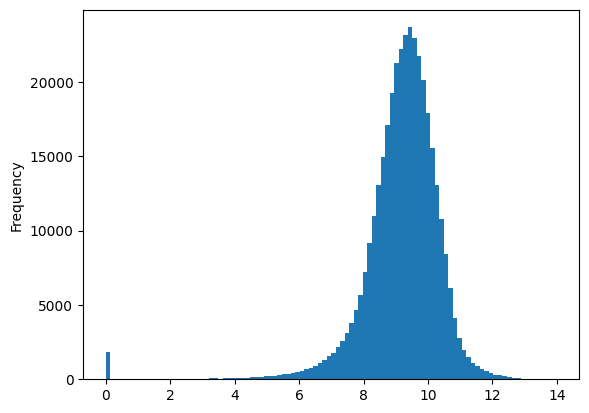

In [165]:
df_cleaned['revol_bal_log'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

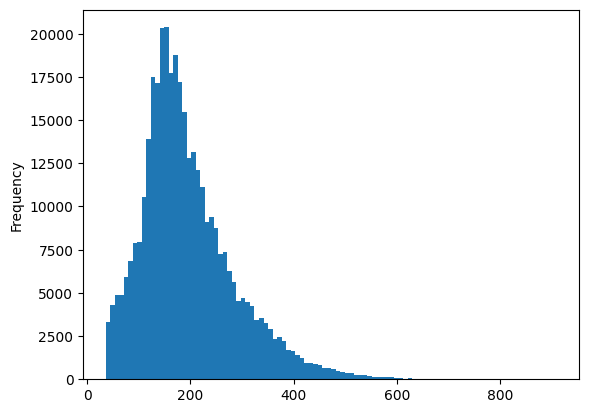

In [166]:
df_cleaned['earliest_cr_line_months'].plot.hist(bins=100)

In [167]:
df_cleaned['earliest_cr_line_months_log'] = np.log(df_cleaned['earliest_cr_line_months'])

<Axes: ylabel='Frequency'>

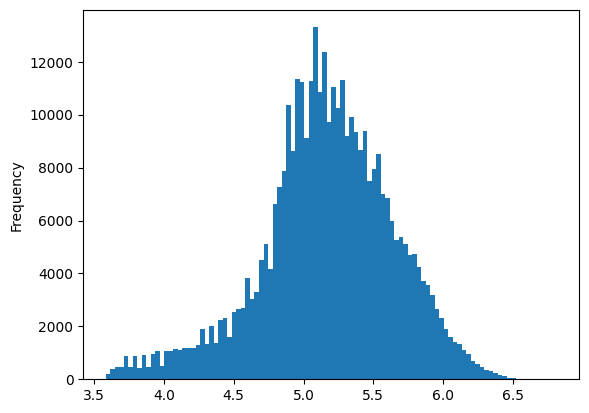

In [168]:
df_cleaned['earliest_cr_line_months_log'].plot.hist(bins=100)

<Axes: >

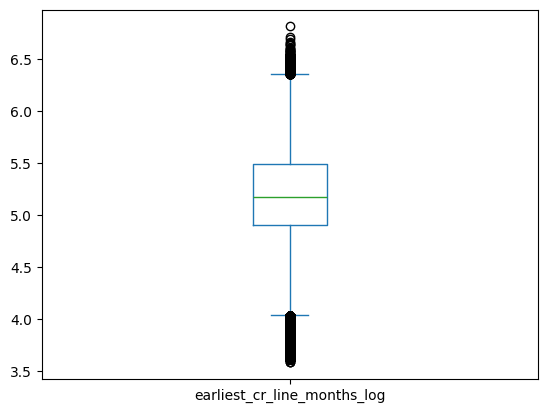

In [171]:
df_cleaned['earliest_cr_line_months_log'].plot.box()

In [172]:
df_cleaned['earliest_cr_line_months_log'].skew()

np.float64(-0.41225720217128764)

In [173]:
df_cleaned['loan_amnt_log'] = np.log(df_cleaned['loan_amnt'])

<Axes: ylabel='Frequency'>

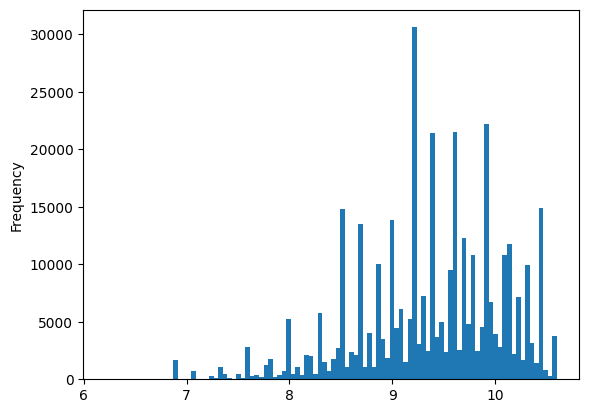

In [174]:
df_cleaned['loan_amnt_log'].plot.hist(bins=100)

In [175]:
df_cleaned['loan_amnt'].skew()

np.float64(0.7974860389324712)

In [176]:
df_cleaned['loan_amnt_log'].skew()

np.float64(-0.6476793862575894)

In [180]:
skewness_values_before = {}
skewness_values_after = {}

for x in df.columns:
    if(x in continuous_cols):
        skewness_values_before[x]=df[x].skew()

for x in df_cleaned.columns:
    if(x in continuous_cols):
        skewness_values_after[x]=df_cleaned[x].skew()

In [91]:
pd.Series(skewness_values_before).sort_values()

id                          0.035165
revol_util_num              0.088529
int_rate_num                0.754474
loan_amnt                   0.797364
earliest_cr_line_months     1.085574
revol_bal                   9.670985
dti                        29.813011
annual_inc                 41.808500
dtype: float64

In [92]:
pd.Series(skewness_values_after).sort_values()

revol_bal_log                 -2.612076
loan_amnt_log                 -0.647679
earliest_cr_line_months_log   -0.412257
revol_util_num                -0.023029
id                             0.035877
annual_inc_log                 0.190963
int_rate_num                   0.754286
dti                            0.767405
dtype: float64

<Axes: ylabel='Frequency'>

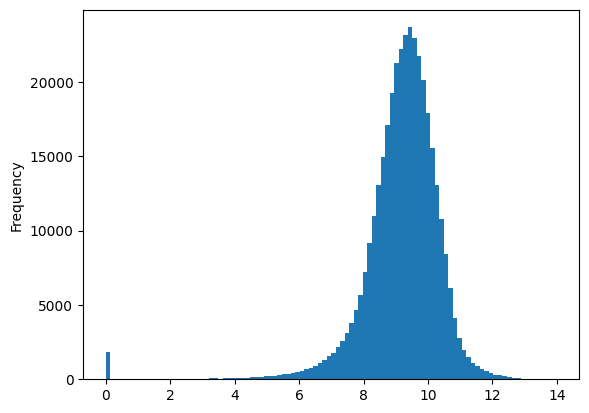

In [181]:
df_cleaned['revol_bal_log'].plot.hist(bins=100)

##### here higher skewnedd for revol_bal_log is because, it is having values 0, but we shoudn't remove them as they are valid data points

In [182]:
## so we were benefited with our every log transformation
df_cleaned = df_cleaned.drop(columns=['annual_inc', 'revol_bal', 'earliest_cr_line_months', 'loan_amnt'])

### 2. Discrete Numerical Features:

In [183]:
discreate_cols

['open_acc',
 'pub_rec',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'fico_range',
 'term_num',
 'sub_grade_map',
 'emp_length_num']

In [184]:
df_cleaned[discreate_cols].describe().round(2)

,open_acc,pub_rec,total_acc,mort_acc,pub_rec_bankruptcies,fico_range,term_num,sub_grade_map,emp_length_num
count,371069.00,371069.00,371069.00,371069.00,371069.00,371069.00,371069.00,371069.00,371069.00
mean,11.63,0.21,24.60,1.60,0.13,699.66,42.00,11.41,5.61
std,5.59,0.59,12.03,1.93,0.37,32.71,10.39,6.36,3.81
min,1.00,0.00,2.00,0.00,0.00,662.00,36.00,1.00,0.00
25%,8.00,0.00,16.00,0.00,0.00,672.00,36.00,7.00,2.00
50%,11.00,0.00,23.00,1.00,0.00,692.00,36.00,11.00,5.00
75%,14.00,0.00,31.00,3.00,0.00,717.00,60.00,15.00,10.00
max,90.00,61.00,146.00,36.00,11.00,847.50,60.00,35.00,10.00


In [185]:
disc_cols_to_clip = ['open_acc', 'pub_rec', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

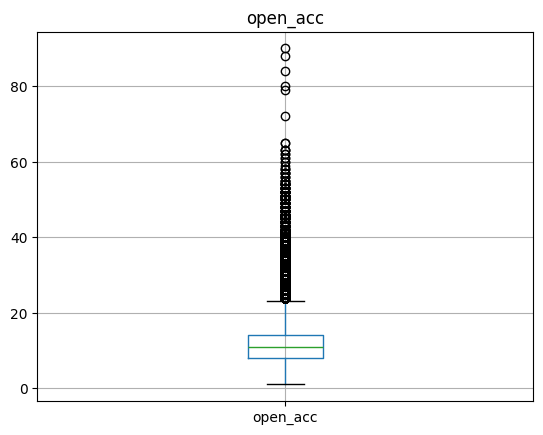

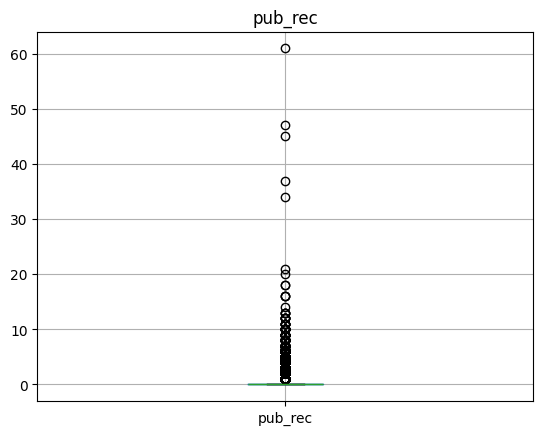

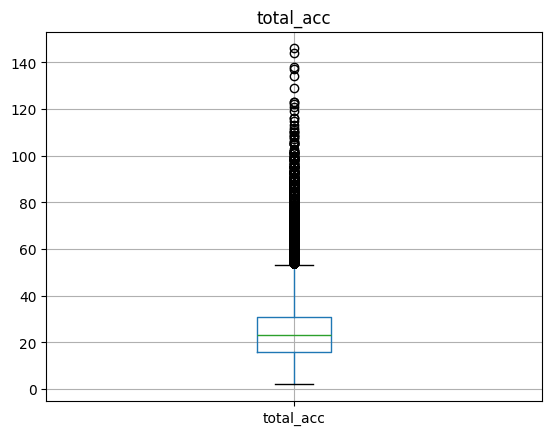

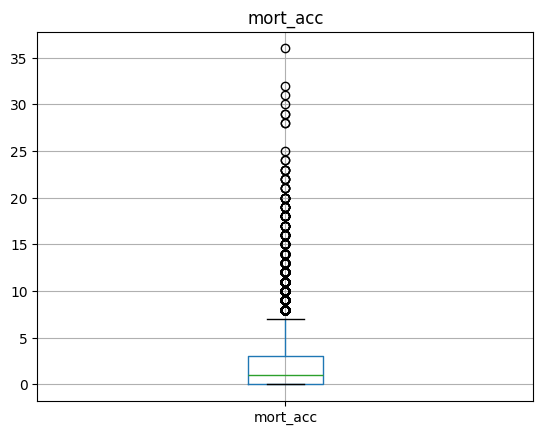

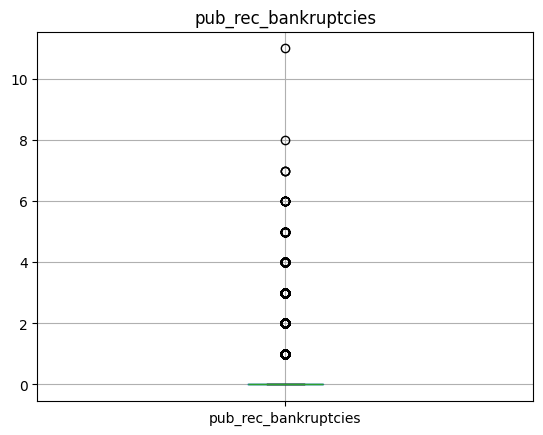

In [199]:
for x in disc_cols_to_clip:
    df_cleaned.boxplot(column=x)
    plt.title(x)
    plt.show()

In [200]:
for x in disc_cols_to_clip:
    print(df_cleaned[x].value_counts().sort_index())

open_acc
1.0       183
2.0      1494
3.0      4981
4.0     10762
5.0     17443
        ...  
79.0        1
80.0        1
84.0        1
88.0        1
90.0        1
Name: count, Length: 70, dtype: int64
pub_rec
0.0     309397
1.0      52165
2.0       6286
3.0       1852
4.0        660
5.0        349
6.0        161
7.0         79
8.0         48
9.0         22
10.0        20
11.0         7
12.0         6
13.0         4
14.0         1
16.0         3
18.0         2
20.0         1
21.0         1
34.0         1
37.0         1
45.0         1
47.0         1
61.0         1
Name: count, dtype: int64
total_acc
2.0       147
3.0       514
4.0      1528
5.0      2426
6.0      3565
         ... 
134.0       1
137.0       1
138.0       1
144.0       1
146.0       1
Name: count, Length: 123, dtype: int64
mort_acc
0.0     151093
1.0      67282
2.0      55471
3.0      39645
4.0      25822
5.0      14916
6.0       8282
7.0       4169
8.0       2108
9.0       1019
10.0       561
11.0       298
12.0       13

In [204]:
for x in disc_cols_to_clip:
    print(x, ": ", df_cleaned[x].quantile(0.999))

open_acc :  41.0
pub_rec :  5.0
total_acc :  81.0
mort_acc :  12.0
pub_rec_bankruptcies :  3.0


In [205]:
df_cleaned['open_acc'] = df_cleaned['open_acc'].clip(upper=df_cleaned['open_acc'].quantile(0.999))
df_cleaned['total_acc'] = df_cleaned['total_acc'].clip(upper=df_cleaned['total_acc'].quantile(0.999))
df_cleaned['mort_acc'] = df_cleaned['mort_acc'].clip(upper=df_cleaned['mort_acc'].quantile(0.999))

In [206]:
print(df_cleaned['pub_rec'].value_counts())

pub_rec
0.0     309397
1.0      52165
2.0       6286
3.0       1852
4.0        660
5.0        349
6.0        161
7.0         79
8.0         48
9.0         22
10.0        20
11.0         7
12.0         6
13.0         4
16.0         3
18.0         2
34.0         1
21.0         1
37.0         1
47.0         1
45.0         1
20.0         1
14.0         1
61.0         1
Name: count, dtype: int64


In [207]:
df_cleaned['pub_rec_clip'] = df_cleaned['pub_rec'].clip(upper=df_cleaned['pub_rec'].quantile(0.999))

In [208]:
print(df_cleaned['pub_rec_clip'].value_counts())

pub_rec_clip
0.0    309397
1.0     52165
2.0      6286
3.0      1852
5.0       709
4.0       660
Name: count, dtype: int64


In [209]:
df_cleaned['pub_rec_bankruptcies_clip'] = df_cleaned['pub_rec_bankruptcies'].clip(upper=df_cleaned['pub_rec_bankruptcies'].quantile(0.999))

In [210]:
print(df_cleaned['pub_rec_bankruptcies'].value_counts())

pub_rec_bankruptcies
0.0     324825
1.0      43730
2.0       2007
3.0        353
4.0        106
5.0         31
6.0         12
7.0          3
11.0         1
8.0          1
Name: count, dtype: int64


In [211]:
print(df_cleaned['pub_rec_bankruptcies_clip'].value_counts())

pub_rec_bankruptcies_clip
0.0    324825
1.0     43730
2.0      2007
3.0       507
Name: count, dtype: int64


In [212]:
df_cleaned = df_cleaned.drop(columns=['pub_rec_bankruptcies', 'pub_rec'])

In [214]:
for x in df_cleaned.columns:
    if(df_cleaned[x].dtype!='O' and x not in ['issue_d_date']):
        print(f'{x}: {df_cleaned[x].skew()}')

id: 0.0358770438091573
dti: 0.7674051006490228
open_acc: 1.216888263213833
total_acc: 0.9237480299152611
mort_acc: 1.465567790622594
fico_range: 1.228430774316801
term_num: 1.1542779068695184
int_rate_num: 0.7542859936917072
sub_grade_map: 0.598861202208014
emp_length_num: -0.0796970560339908
revol_util_num: -0.023028637124352755
annual_inc_log: 0.19096253541399713
revol_bal_log: -2.6120755480433027
earliest_cr_line_months_log: -0.41225720217128764
loan_amnt_log: -0.6476793862575894
pub_rec_clip: 3.754692340215244
pub_rec_bankruptcies_clip: 2.894720120591447


In [218]:
discreate_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
discreate_cols

['id',
 'dti',
 'open_acc',
 'total_acc',
 'mort_acc',
 'fico_range',
 'term_num',
 'int_rate_num',
 'sub_grade_map',
 'emp_length_num',
 'revol_util_num',
 'annual_inc_log',
 'revol_bal_log',
 'earliest_cr_line_months_log',
 'loan_amnt_log',
 'pub_rec_clip',
 'pub_rec_bankruptcies_clip']

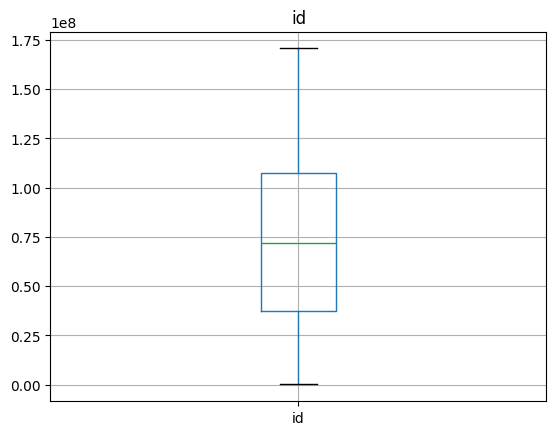

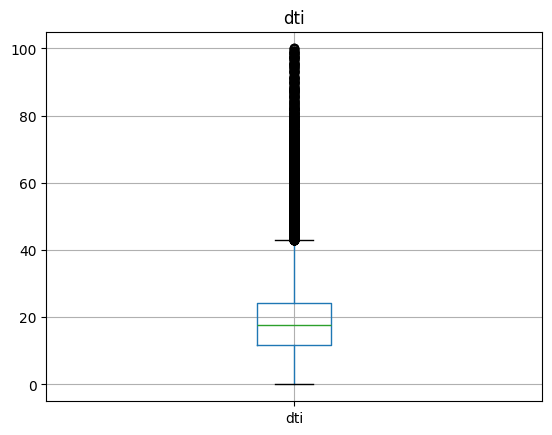

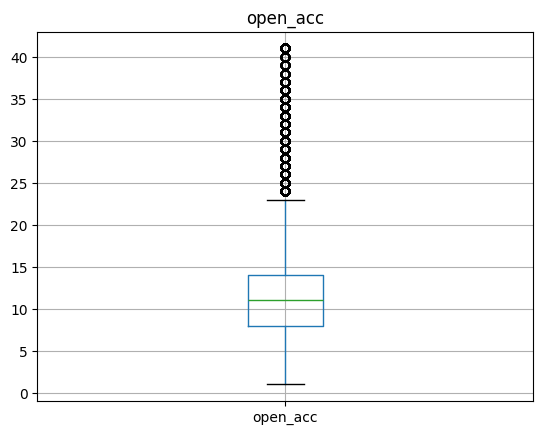

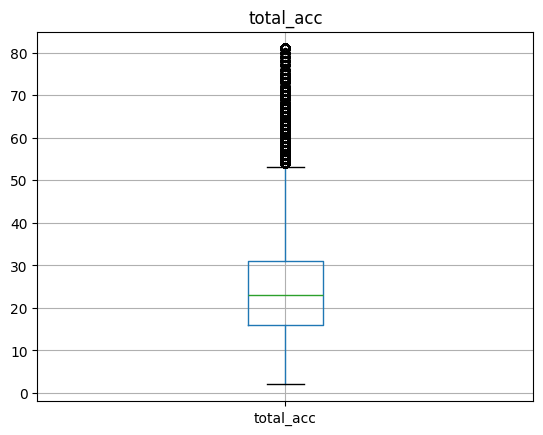

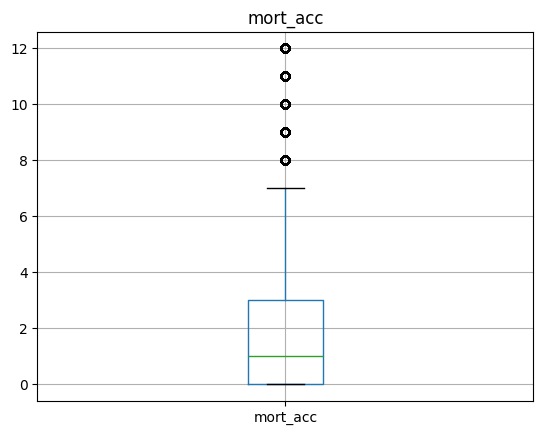

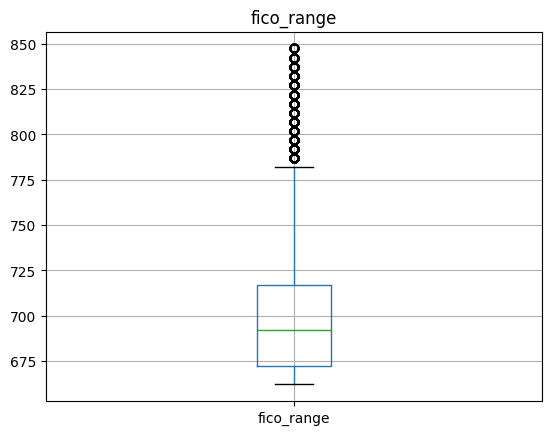

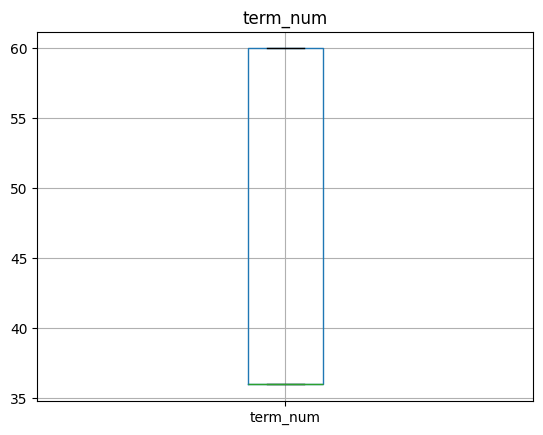

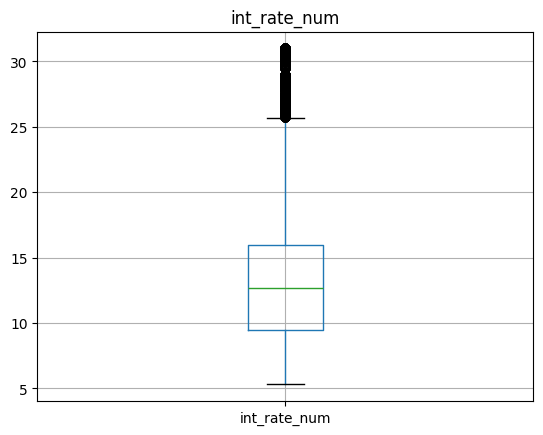

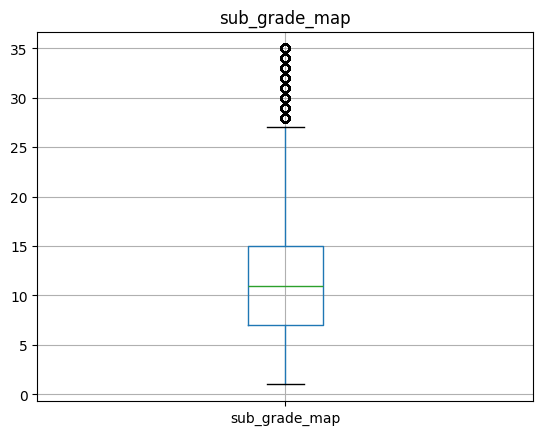

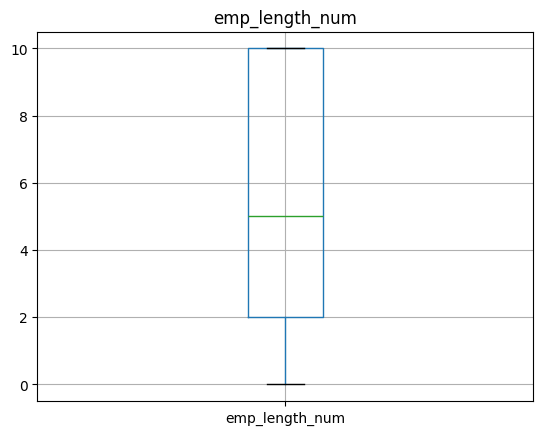

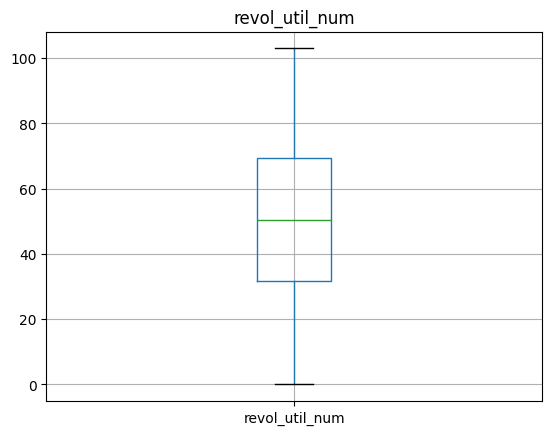

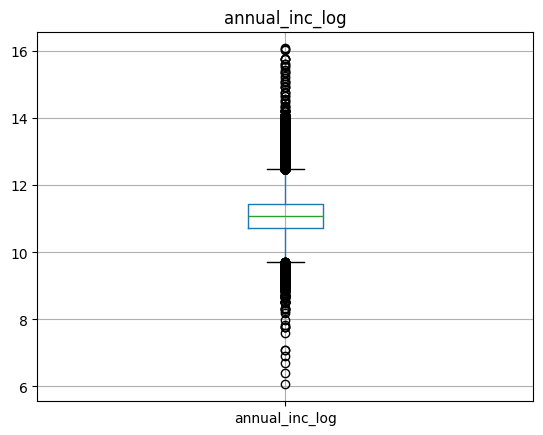

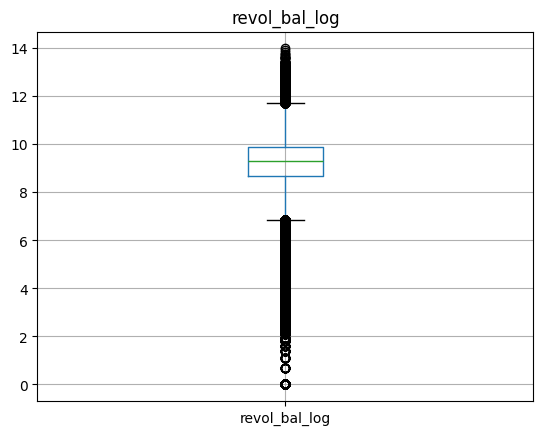

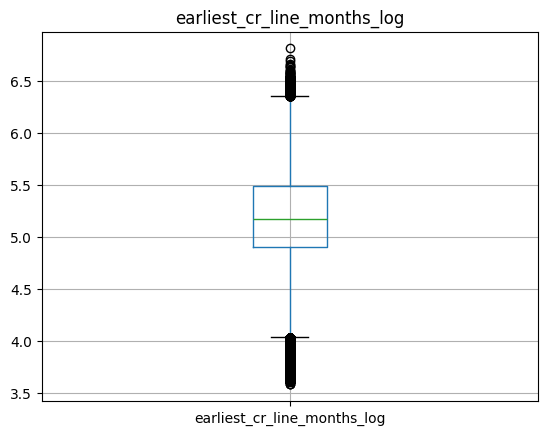

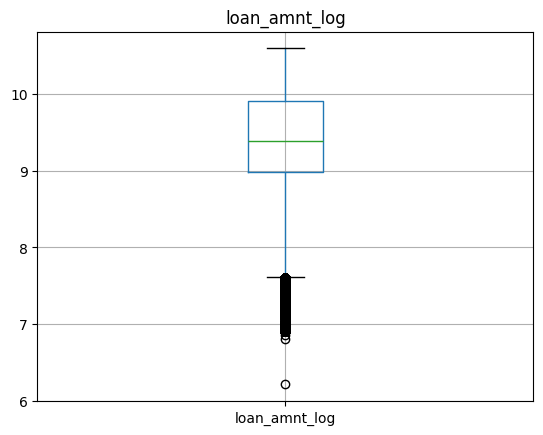

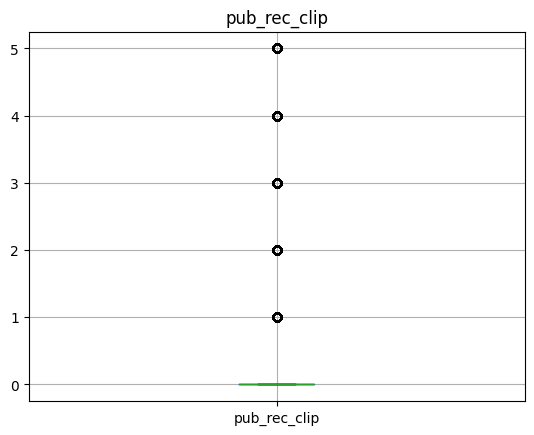

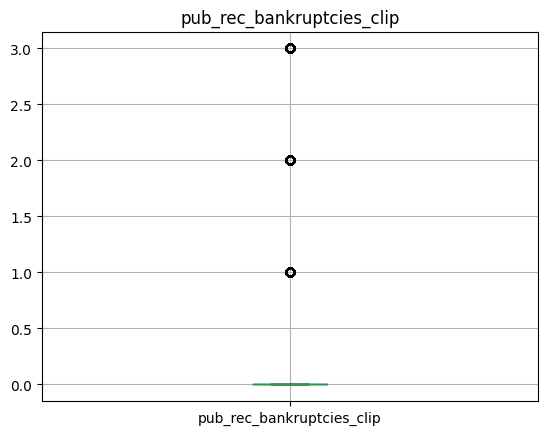

In [221]:
for x in discreate_cols:
        df_cleaned.boxplot(column=x)
        plt.title(x)
        plt.show()

### Good enough

## 3. For Categorical Features:

In [222]:
categorical_cols

['purpose',
 'application_type',
 'verification_status',
 'loan_status',
 'home_ownership_new']

In [223]:
for x in categorical_cols:
    print(f'{x}:\t {df_cleaned[x].value_counts().size}:\t {df_cleaned[x].value_counts(normalize=100)*100}')

purpose:	 8:	 purpose
debt_consolidation    57.221164
credit_card           22.184823
other                  8.306811
home_improvement       6.605780
major_purchase         2.241901
medical                1.233463
small_business         1.118929
car                    1.087129
Name: proportion, dtype: float64
application_type:	 2:	 application_type
Individual    96.394741
Joint App      3.605259
Name: proportion, dtype: float64
verification_status:	 3:	 verification_status
Source Verified    39.489421
Not Verified       31.558282
Verified           28.952297
Name: proportion, dtype: float64
loan_status:	 3:	 loan_status
Fully Paid     80.503626
Charged Off    19.472659
Default         0.023715
Name: proportion, dtype: float64
home_ownership_new:	 4:	 home_ownership_new
MORTGAGE    49.343384
RENT        39.549518
OWN         11.033258
OTHER        0.073841
Name: proportion, dtype: float64


In [224]:
for x in categorical_cols:
    print(f'{x}:\t {df_cleaned[x].value_counts(normalize=100)*100}')

purpose:	 purpose
debt_consolidation    57.221164
credit_card           22.184823
other                  8.306811
home_improvement       6.605780
major_purchase         2.241901
medical                1.233463
small_business         1.118929
car                    1.087129
Name: proportion, dtype: float64
application_type:	 application_type
Individual    96.394741
Joint App      3.605259
Name: proportion, dtype: float64
verification_status:	 verification_status
Source Verified    39.489421
Not Verified       31.558282
Verified           28.952297
Name: proportion, dtype: float64
loan_status:	 loan_status
Fully Paid     80.503626
Charged Off    19.472659
Default         0.023715
Name: proportion, dtype: float64
home_ownership_new:	 home_ownership_new
MORTGAGE    49.343384
RENT        39.549518
OWN         11.033258
OTHER        0.073841
Name: proportion, dtype: float64


In [225]:
purpose_counts = df_cleaned['purpose'].value_counts(normalize=100)
purpose_others = purpose_counts[purpose_counts<0.01].index
purpose_others

Index([], dtype='object', name='purpose')

In [226]:
df_cleaned['purpose_new'] = df_cleaned['purpose'].replace(purpose_others, 'other')

In [227]:
df_cleaned['purpose_new'].value_counts(normalize=100)*100

purpose_new
debt_consolidation    57.221164
credit_card           22.184823
other                  8.306811
home_improvement       6.605780
major_purchase         2.241901
medical                1.233463
small_business         1.118929
car                    1.087129
Name: proportion, dtype: float64

In [228]:
df_cleaned['purpose'] = df_cleaned['purpose_new']

In [229]:
df_cleaned = df_cleaned.drop(columns=['purpose_new'])

In [230]:
len(df_cleaned.columns)

23

In [231]:
len(df.columns)

23

### 3. Multivariate Outliers

In [232]:
df_cleaned[df_cleaned['open_acc']>df_cleaned['total_acc']]

,id,purpose,application_type,verification_status,dti,open_acc,total_acc,mort_acc,loan_status,fico_range,term_num,int_rate_num,sub_grade_map,emp_length_num,home_ownership_new,issue_d_date,revol_util_num,annual_inc_log,revol_bal_log,earliest_cr_line_months_log,loan_amnt_log,pub_rec_clip,pub_rec_bankruptcies_clip


In [233]:
df_cleaned[df_cleaned['mort_acc']>df_cleaned['total_acc']]

,id,purpose,application_type,verification_status,dti,open_acc,total_acc,mort_acc,loan_status,fico_range,term_num,int_rate_num,sub_grade_map,emp_length_num,home_ownership_new,issue_d_date,revol_util_num,annual_inc_log,revol_bal_log,earliest_cr_line_months_log,loan_amnt_log,pub_rec_clip,pub_rec_bankruptcies_clip


### Done with outlier removal, now saving this file for next steps

In [234]:
df_cleaned.to_csv('E:/Projects/Learn ML/loan-default-predictor/data/3_removed_outliers.csv', index=False)